# # Model: Bootstrapping and Bagging

### Author: Ehsan Gharib-Nezhad



In [1]:
from myfunctions import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler


# # Import Bagging Classifier.
from sklearn.ensemble import BaggingClassifier

In [22]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)
is_balanced = False # set True is the dataset is balanced!!! 

### Set up X and Y

In [23]:
X = df['post']
y = df['is_Covid19positive']

## check baseline:

In [24]:
y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

## train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    random_state = 42)

In [26]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

# ======================================================

## Use count vectorizer

In [27]:
cvec = CountVectorizer()

In [28]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test  = cvec.transform(X_test)

# ======================================================
## For imbalanced case

In [29]:
ros = RandomOverSampler()

Xcv_train , y_train = ros.fit_resample(Xcv_train, y_train)

# ================================================

# Bagging: Bootstrap Aggregating

Decision trees are powerful machine learning models. However, decision trees have some limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns (a.k.a. they overfit their training sets). 

Bagging (bootstrap aggregating) mitigates this problem by exposing different trees to different sub-samples of the training set.  

In [30]:
# Instantiate BaggingClassifier.

bag = BaggingClassifier(random_state = 42)

In [31]:
bag.fit(Xcv_train, y_train)

BaggingClassifier(random_state=42)

In [32]:
# Evaluate model: Accuracy

print(f'Score on training set: {bag.score(Xcv_train, y_train)}')
print(f'Score on testing set: {bag.score(Xcv_test, y_test)}')
# we have overfitting because we need more Qs 

Score on training set: 0.9964675797503467
Score on testing set: 0.9496194273287423


Score on training set: 0.9964675797503467
Score on testing set: 0.9496194273287423
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       585
           1       0.98      0.97      0.97      7692

    accuracy                           0.95      8277
   macro avg       0.80      0.84      0.82      8277
weighted avg       0.95      0.95      0.95      8277



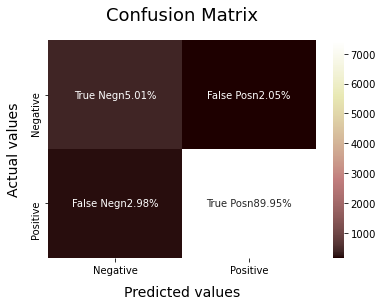

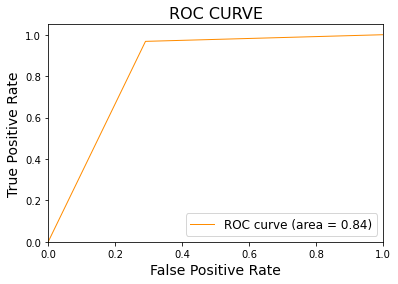

In [33]:
# View confusion matrix
model_Evaluate(bag, Xcv_train, Xcv_test, y_train, y_test)

In [34]:
save_model_Evaluate_values(bag, Xcv_train, Xcv_test, y_train, y_test,  
                           model_name='Bagging',
                           balanced=is_balanced)

(   score   metric    model balanced
 0   1.00  R_train  Bagging       no
 1   0.95   R_test  Bagging       no,
    is_pandemicPreps  is_covid19positive     metric    model balanced
 0              0.63                0.98  precision  Bagging       no
 1              0.71                0.97     recall  Bagging       no
 2              0.67                0.97     fscore  Bagging       no
 3            585.00             7692.00    support  Bagging       no,
    score     metric    model balanced
 0   0.05   True Neg  Bagging       no
 1   0.02  False Pos  Bagging       no
 2   0.03  False Neg  Bagging       no
 3   0.90   True Pos  Bagging       no)

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

##  Hyperparameters of Decision Trees
# ===================================================

There are four hyperparameters of decision trees that we may commonly tune in order to prevent overfitting.

- `max_depth`: The maximum depth of the tree.
    - By default, the nodes are expanded until all leaves are pure (or some other argument limits the growth of the tree).
    - In the 20 questions analogy, this is like "How many questions we can ask?"
    
    
- `min_samples_split`: The minimum number of samples required to split an internal node.
    - By default, the minimum number of samples required to split is 2. That is, if there are two or more observations in a node and if we haven't already achieved maximum purity, we can split it!
    
    
- `min_samples_leaf`: The minimum number of samples required to be in a leaf node (a terminal node at the end of the tree).
    - By default, the minimum number of samples required in a leaf node is 1. (This should ring alarm bells - it's very possible that we'll overfit our model to the data!)


- `ccp_alpha`: A [complexity parameter](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) similar to $\alpha$ in regularization. As `ccp_alpha` increases, we regularize more.
    - By default, this value is 0.

[Source: Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [35]:
# param_grid = {
#     'base_estimator__max_depth' : [1, 2, 3, 4, 5],
#     'max_samples' : [0.05, 0.1, 0.2, 0.5]
# }


# clf.fit(Xcv_train, y_train)

In [36]:
# Instantiate model with:
# - a maximum depth of 5.
# - at least 7 samples required in order to split an internal node.
# - at least 3 samples in each leaf node.
# - a cost complexity of 0.01.
# - random state of 42.

param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5, 1 , 2, 5],
#     'min_samples_split' : [5, 10, 15, 20],
#     'min_samples_leaf': [3, 5, 7],
#     'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
}

# params = {
#          'estimator' : [DecisionTreeClassifier],
#          'max_depth' : [2, 3, 5, 7, 9],
#          'min_samples_split' : [5, 10, 15, 20],
#          'min_samples_leaf': [3, 5, 7],
#          'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
#          }

In [37]:
# gs = GridSearchCV(BaggingClassifier(random_state = 42), param_grid= params, cv = 5 )
gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                    n_estimators = 100, max_features = 0.5),
                    param_grid,
                    cv = 5)

In [38]:
gs.fit(Xcv_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5, 1, 2, 5]})

In [39]:
# What is our best decision tree?
gs.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.2}

Score on training set: 0.9053181345353676
Score on testing set: 0.8611815875317144
              precision    recall  f1-score   support

           0       0.33      0.93      0.49       585
           1       0.99      0.86      0.92      7692

    accuracy                           0.86      8277
   macro avg       0.66      0.89      0.70      8277
weighted avg       0.95      0.86      0.89      8277



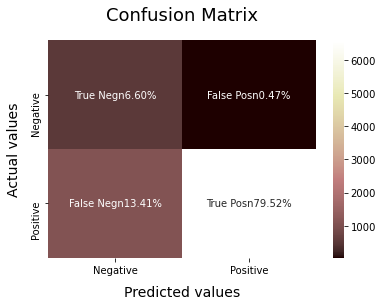

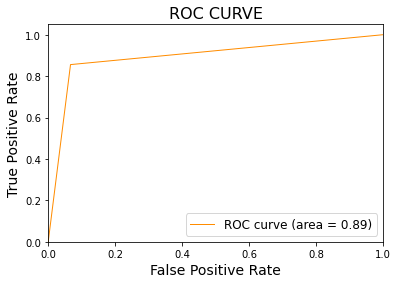

In [40]:
# View confusion matrix
model_Evaluate(gs, Xcv_train, Xcv_test, y_train, y_test)

In [41]:
save_model_Evaluate_values(gs, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Bagging-GridSearchCV', balanced = is_balanced)

(   score   metric                 model balanced
 0   0.91  R_train  Bagging-GridSearchCV       no
 1   0.86   R_test  Bagging-GridSearchCV       no,
    is_pandemicPreps  is_covid19positive     metric                 model  \
 0              0.33                0.99  precision  Bagging-GridSearchCV   
 1              0.93                0.86     recall  Bagging-GridSearchCV   
 2              0.49                0.92     fscore  Bagging-GridSearchCV   
 3            585.00             7692.00    support  Bagging-GridSearchCV   
 
   balanced  
 0       no  
 1       no  
 2       no  
 3       no  ,
    score     metric                 model balanced
 0   0.07   True Neg  Bagging-GridSearchCV       no
 1   0.00  False Pos  Bagging-GridSearchCV       no
 2   0.13  False Neg  Bagging-GridSearchCV       no
 3   0.80   True Pos  Bagging-GridSearchCV       no)

# Feature Importance

In [29]:
f = {'Feature Name':df_X_train.columns,'Feature Coefficient':dt.feature_importances_}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Coefficient'], ascending = False).head(20)

NameError: name 'df_X_train' is not defined

In [ ]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Coefficient',y='Feature Name', 
            data=fi.sort_values(by='Feature Coefficient', ascending=False).iloc[0:20],
            palette='coolwarm')
plt.xlabel('Feature Coefficient ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

## Visualizing the Output of Decision Trees


In [27]:
# Import plot_tree from sklearn.tree module.
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (30, 50))

# Plot our tree.
plot_tree(gs.best_estimator_,
          feature_names = df_X_train.columns,
          class_names = ['Prep', 'Positive'],
          filled = True,
          fontsize=15);

TypeError: <bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)> is not an estimator instance.

<Figure size 2160x3600 with 0 Axes>